## Validate on CIFAR-10

In [1]:
# dependencies
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import torch.optim as optim
import time


from implementation.dropout import Dropout
from utils.tensor_loader import FastTensorDataLoader
from utils.plots import plot_dropout_histories, summarize_metrics

np.random.seed(42)
torch.manual_seed(42)

## Loading CIFAR-10 Dataset

In [2]:
# import dataset
train = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

test = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

train[0][0].shape, train[0][1]

(torch.Size([3, 32, 32]), 6)

In [3]:
train.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

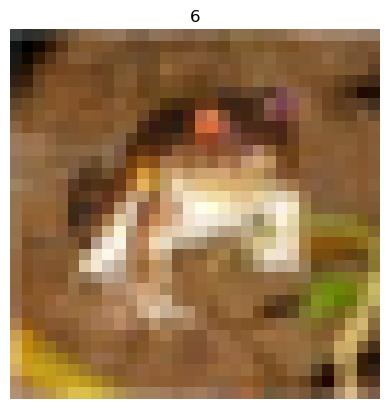

In [4]:
image, label = train[0]
image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(label)
plt.axis("off")
plt.show()

In [5]:
# create fast dataloaders (avoid using if not enough vram)
train_loader = FastTensorDataLoader(train, shuffle=True)
test_loader = FastTensorDataLoader(test, shuffle=False)

In [6]:
from nn_models.simple import SimpleDropoutNetwork
from nn_models.lenet import DropoutLeNet
from nn_models.vgg import DropoutVGG
from utils.validate import train_and_validate

device = 'cuda' if torch.cuda.is_available() else 'cpu'

dropout_models = [
    SimpleDropoutNetwork,
    DropoutLeNet,
    #DropoutVGG
]

dropout_rates = [0.0, 0.2, 0.4, 0.6, 0.8]

results = {}

for dropout_model in dropout_models:
    for p in dropout_rates:
        print(f"\nTesting Dropout p={p}")
        model = dropout_model(dropout_rate=p, dropout_mode="inverted", input_channels=3, img_size=32).to(device)
        history = train_and_validate(model, train_loader, test_loader, epochs=120, max_norm=3.0)
        try:
            results[model.name][p] = history
        except:
            results[model.name] = {}
            results[model.name][p] = history


Testing Dropout p=0.0


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:10<00:00, 11.08it/s]


Finished in 10.83s

Testing Dropout p=0.2


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:11<00:00, 10.73it/s]


Finished in 11.19s

Testing Dropout p=0.4


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:18<00:00,  6.51it/s]


Finished in 18.43s

Testing Dropout p=0.6


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:16<00:00,  7.40it/s]


Finished in 16.22s

Testing Dropout p=0.8


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:16<00:00,  7.41it/s]


Finished in 16.19s

Testing Dropout p=0.0


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:44<00:00,  2.68it/s]


Finished in 44.75s

Testing Dropout p=0.2


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:34<00:00,  3.50it/s]


Finished in 34.26s

Testing Dropout p=0.4


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:36<00:00,  3.32it/s]


Finished in 36.14s

Testing Dropout p=0.6


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:36<00:00,  3.31it/s]


Finished in 36.21s

Testing Dropout p=0.8


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:41<00:00,  2.92it/s]

Finished in 41.15s


In [7]:
summarize_metrics(results)

,Model,Dropout Rate,Test Acc (%),F1 Score,Test Loss
5,LeNet Dropout Neural Network,0.0000,62.0800,0.6206,1.1544
6,LeNet Dropout Neural Network,0.2000,63.4200,0.6313,1.0915
7,LeNet Dropout Neural Network,0.4000,63.9500,0.6389,1.0466
8,LeNet Dropout Neural Network,0.6000,61.6800,0.6139,1.0972
9,LeNet Dropout Neural Network,0.8000,51.3900,0.5005,1.2940
0,Simple Dropout Neural Network,0.0000,51.1800,0.5129,1.7829
1,Simple Dropout Neural Network,0.2000,55.1500,0.5483,1.2933
2,Simple Dropout Neural Network,0.4000,52.7600,0.5210,1.3292
3,Simple Dropout Neural Network,0.6000,46.5800,0.4497,1.5737
4,Simple Dropout Neural Network,0.8000,22.2500,0.1527,2.1110


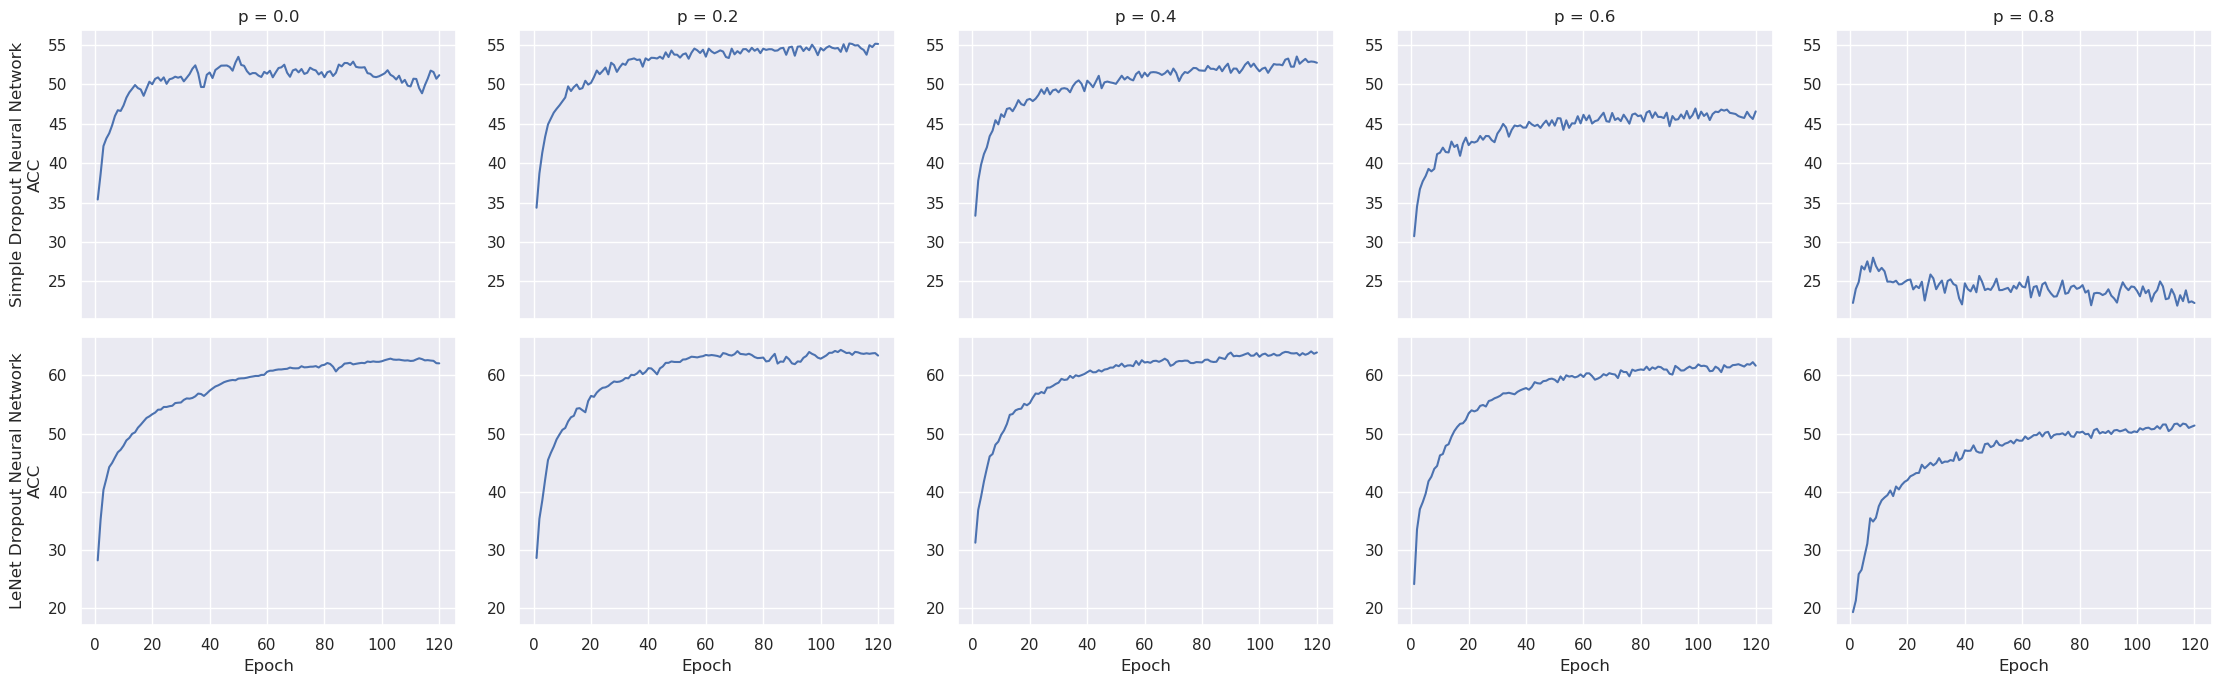

In [8]:
plot_dropout_histories(results, metric="acc")

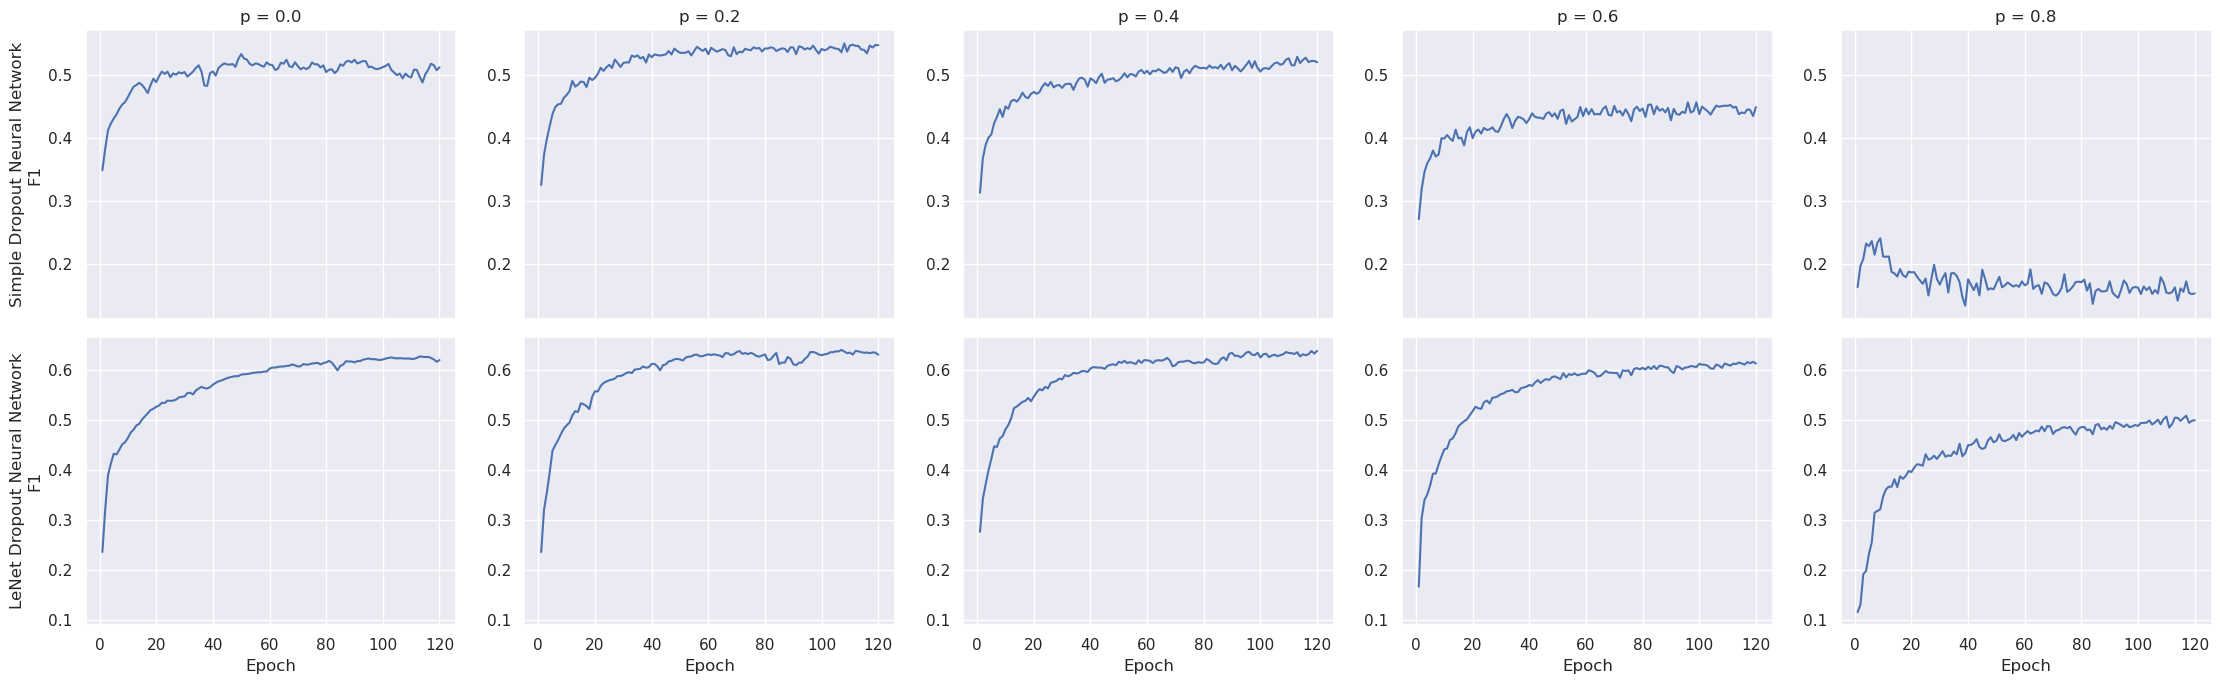

In [9]:
plot_dropout_histories(results, metric="f1")

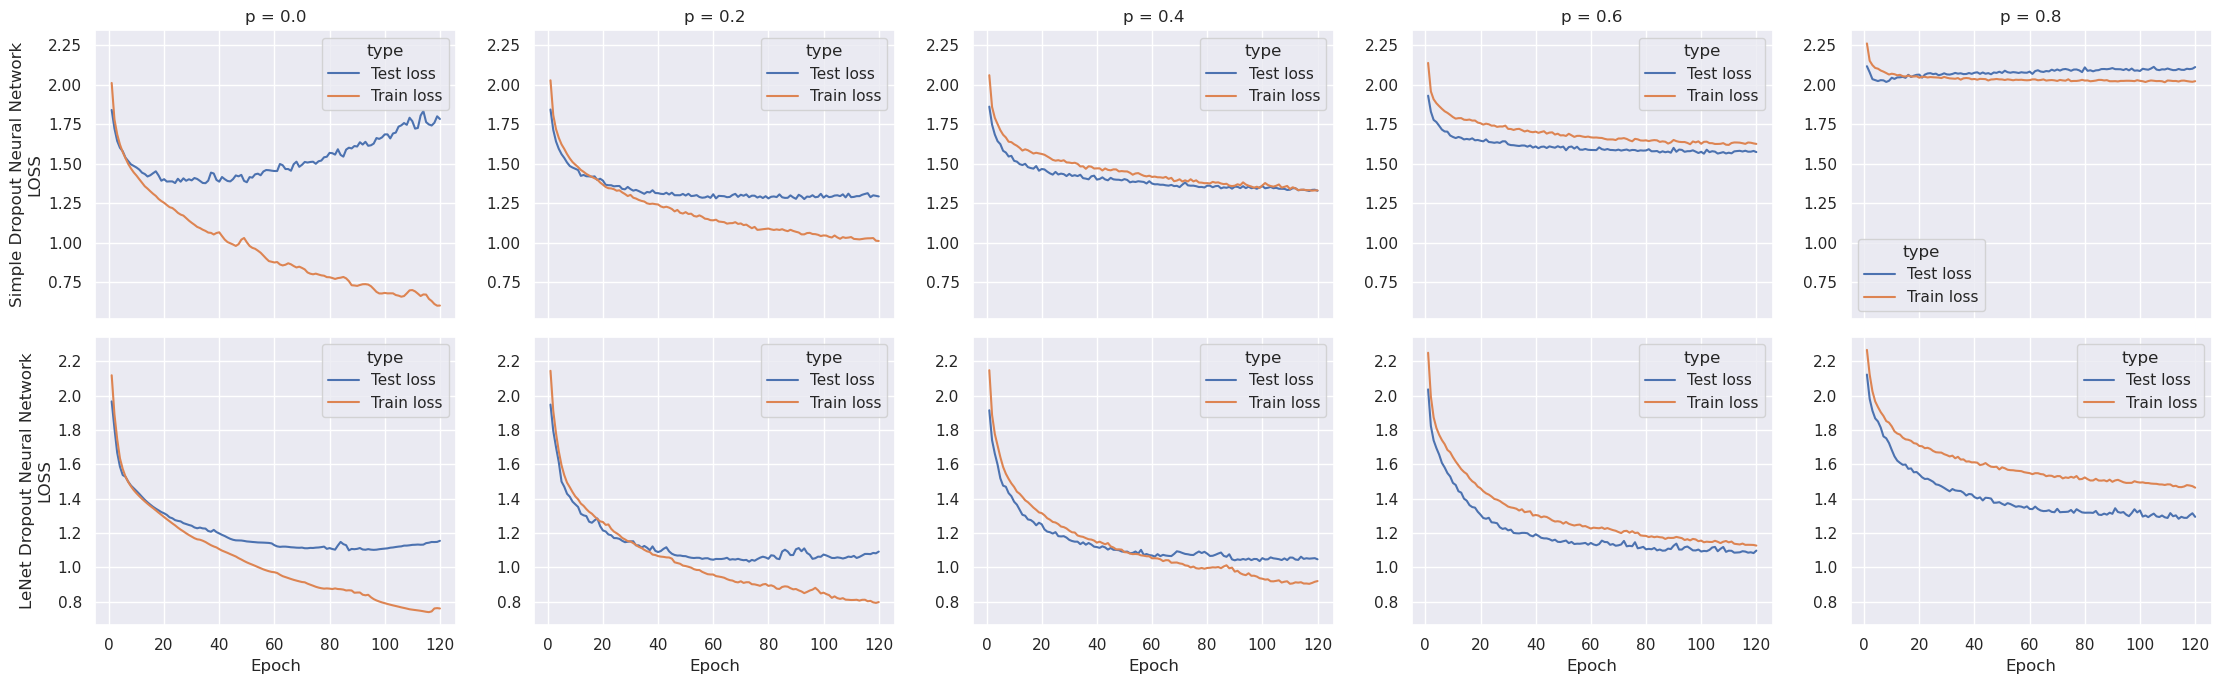

In [10]:
plot_dropout_histories(results, metric="loss")

## Testing Subset

In [11]:
len(train)

50000

In [12]:
indices = np.random.choice(len(train), size=1000, replace=False)
train_subset = Subset(train, indices)

train_loader_small = FastTensorDataLoader(train_subset, shuffle=True, batch_size=4096)

In [13]:
results_small = {}

for dropout_model in dropout_models:
    for p in dropout_rates:
        print(f"\nTesting Dropout p={p}")
        model = dropout_model(dropout_rate=p, dropout_mode="inverted", input_channels=3, img_size=32).to(device)
        history = train_and_validate(model, train_loader_small, test_loader, epochs=120, max_norm=3.0)
        try:
            results_small[model.name][p] = history
        except:
            results_small[model.name] = {}
            results_small[model.name][p] = history


Testing Dropout p=0.0


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:05<00:00, 23.01it/s]


Finished in 5.22s

Testing Dropout p=0.2


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:04<00:00, 27.72it/s]


Finished in 4.33s

Testing Dropout p=0.4


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:03<00:00, 32.26it/s]


Finished in 3.72s

Testing Dropout p=0.6


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:03<00:00, 32.94it/s]


Finished in 3.64s

Testing Dropout p=0.8


Training model 'Simple Dropout Neural Network': 100%|██████████| 120/120 [00:03<00:00, 34.13it/s]


Finished in 3.52s

Testing Dropout p=0.0


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:05<00:00, 21.54it/s]


Finished in 5.57s

Testing Dropout p=0.2


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:05<00:00, 21.48it/s]


Finished in 5.59s

Testing Dropout p=0.4


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:05<00:00, 21.39it/s]


Finished in 5.61s

Testing Dropout p=0.6


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:05<00:00, 20.52it/s]


Finished in 5.85s

Testing Dropout p=0.8


Training model 'LeNet Dropout Neural Network': 100%|██████████| 120/120 [00:05<00:00, 20.86it/s]

Finished in 5.75s


In [14]:
summarize_metrics(results_small)

,Model,Dropout Rate,Test Acc (%),F1 Score,Test Loss
5,LeNet Dropout Neural Network,0.0000,38.4000,0.3825,1.7871
6,LeNet Dropout Neural Network,0.2000,38.2300,0.3757,1.7364
7,LeNet Dropout Neural Network,0.4000,38.5700,0.3695,1.7005
8,LeNet Dropout Neural Network,0.6000,36.6700,0.3431,1.7501
9,LeNet Dropout Neural Network,0.8000,28.2200,0.2179,1.9167
0,Simple Dropout Neural Network,0.0000,34.5500,0.3386,2.1966
1,Simple Dropout Neural Network,0.2000,34.2200,0.3363,2.2954
2,Simple Dropout Neural Network,0.4000,35.1100,0.3447,2.1579
3,Simple Dropout Neural Network,0.6000,35.8200,0.3507,1.8810
4,Simple Dropout Neural Network,0.8000,26.0700,0.2343,2.0304


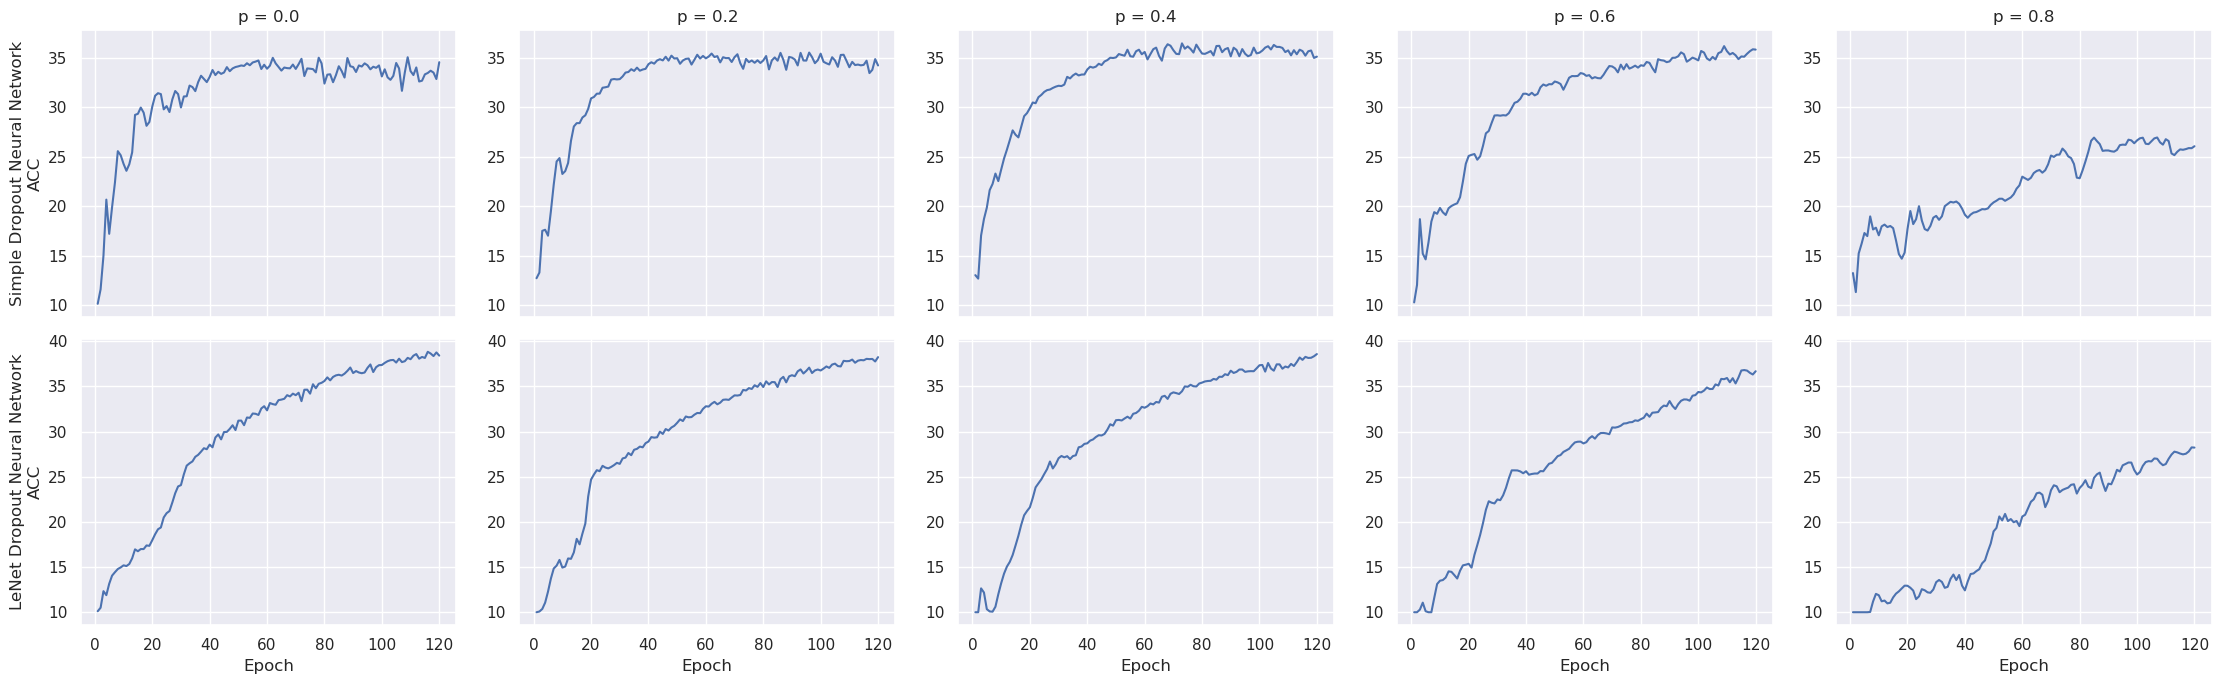

In [15]:
plot_dropout_histories(results_small, metric="acc")

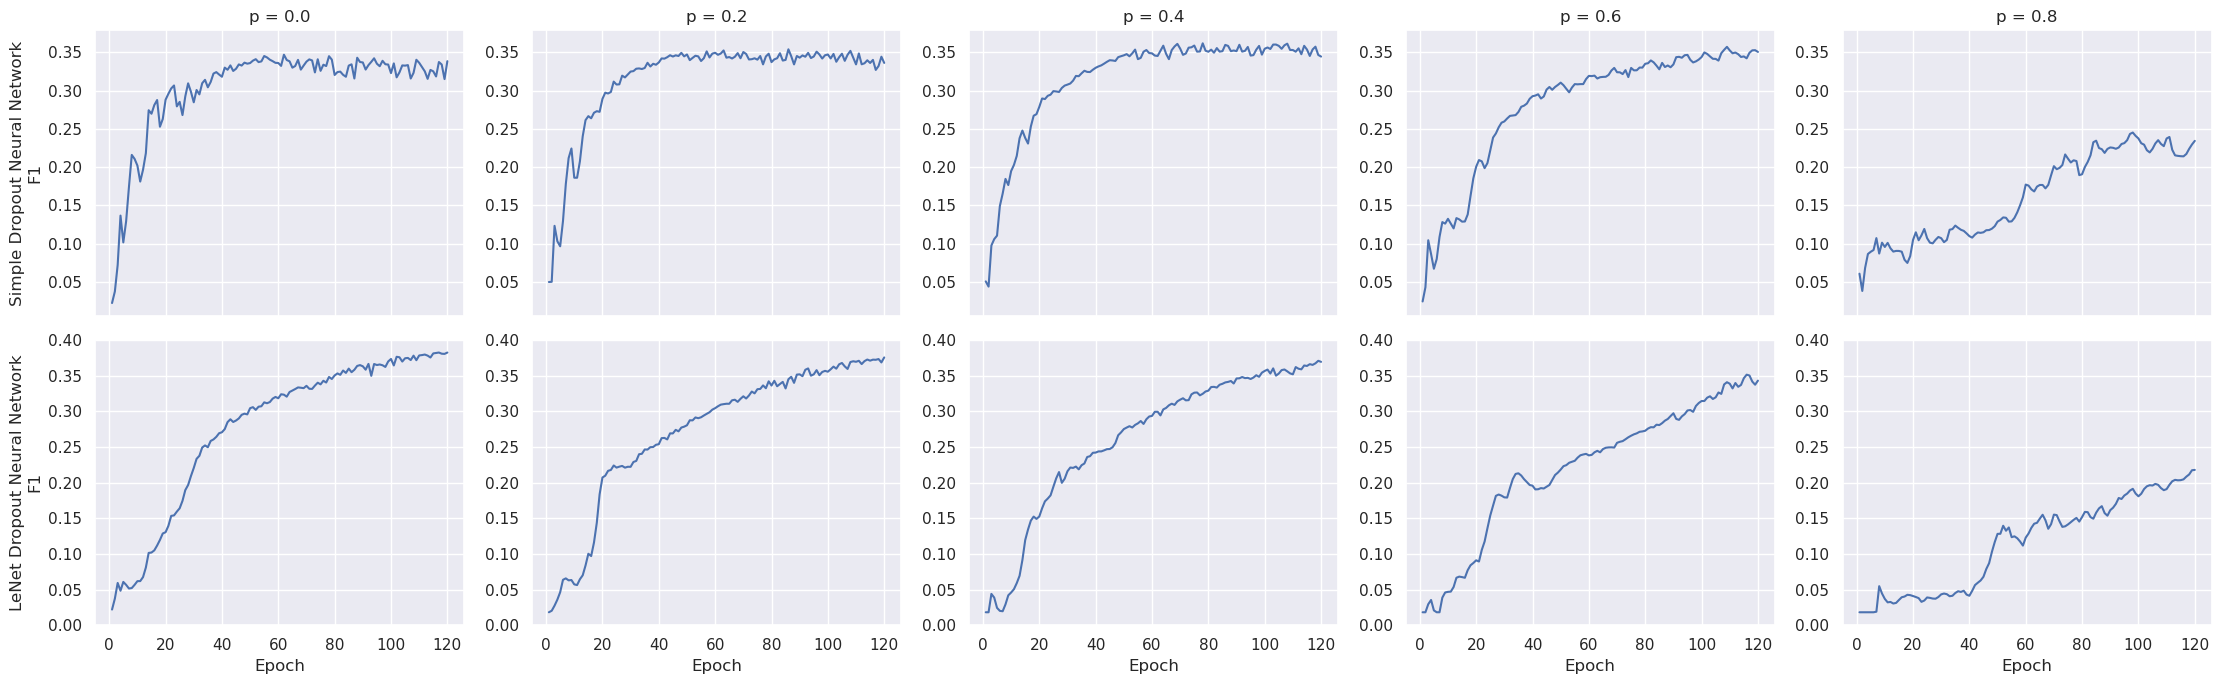

In [16]:
plot_dropout_histories(results_small, metric="f1")

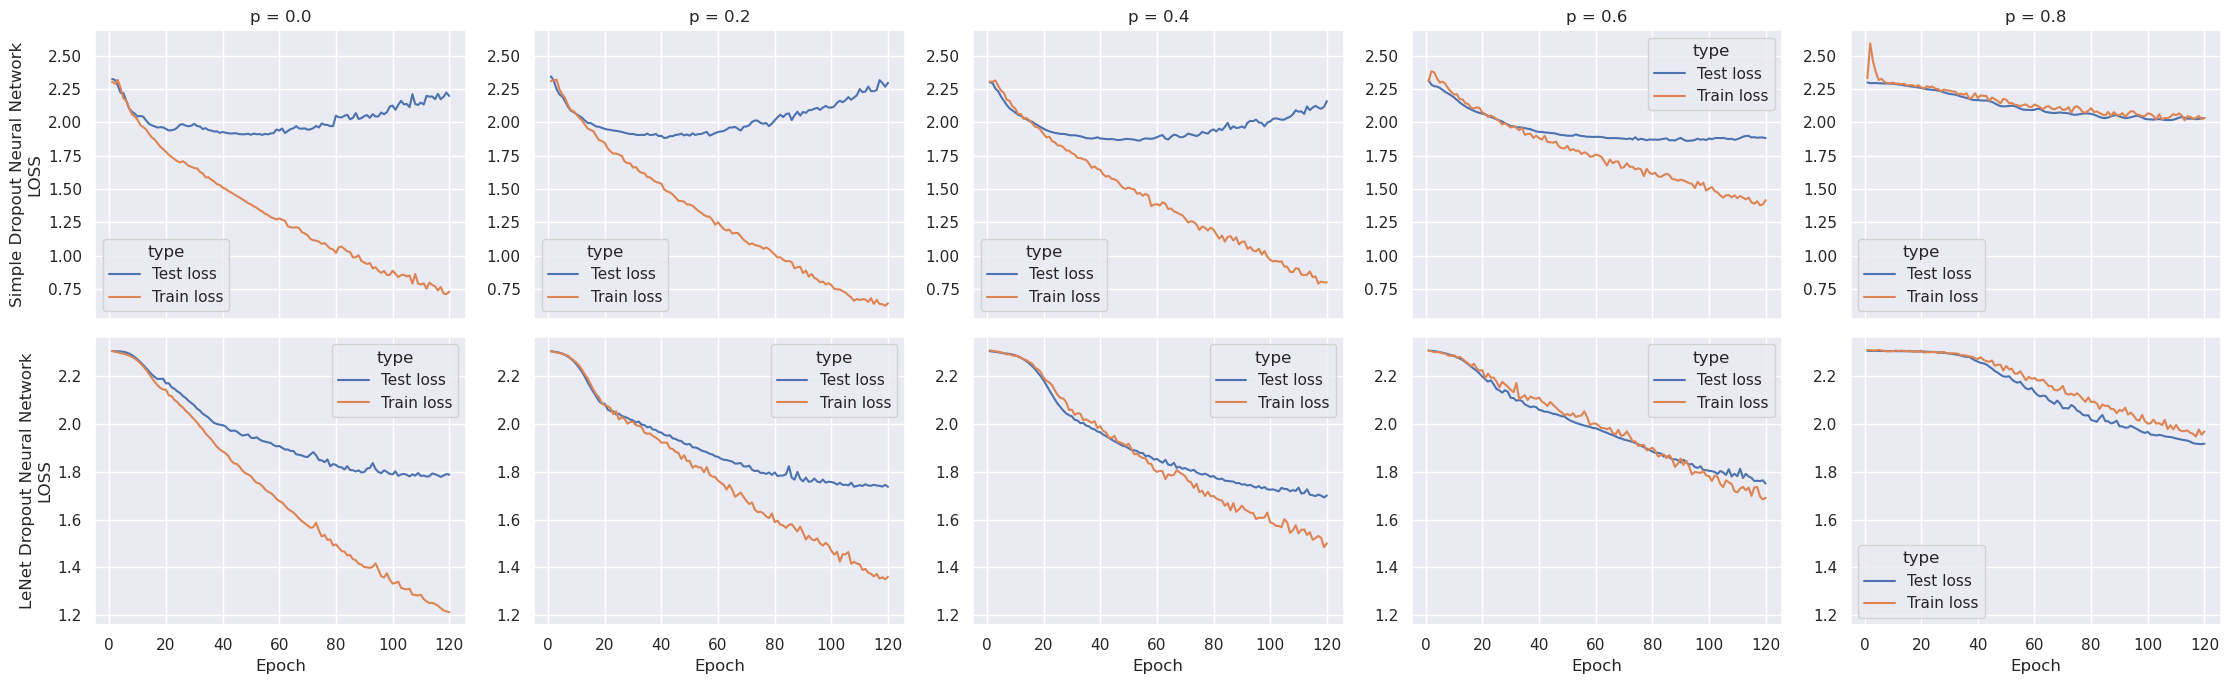

In [17]:
plot_dropout_histories(results_small, metric="loss")

#### É perceptível efeito de overfitting com a perca se tornando cada vez maior na Simple Neural Network, enquanto a LeNet, que usa convolução é mais robusta a overfitting. Assim, os modelos que mais se beneficiam são os que tendem ao overfitting. Dessa forma, é interessante analisar uma rede focada em overfitting:

In [18]:
from nn_models.overfitting import OverfittingProneNetwork

overfit_results = {}
for p in [0.0, 0.2, 0.4, 0.6]:
    print(f"\nTesting Dropout p={p}")
    model = OverfittingProneNetwork(dropout_rate=p, dropout_mode="inverted", input_channels=3, img_size=32).to(device)
    history = train_and_validate(model, train_loader, test_loader, epochs=200, max_norm=3.0)
    try:
        overfit_results[model.name][p] = history
    except:
        overfit_results[model.name] = {}
        overfit_results[model.name][p] = history


Testing Dropout p=0.0


Training model 'Overfitting-Prone Deep Network': 100%|██████████| 200/200 [02:03<00:00,  1.61it/s]


Finished in 123.90s

Testing Dropout p=0.2


Training model 'Overfitting-Prone Deep Network': 100%|██████████| 200/200 [01:38<00:00,  2.04it/s]


Finished in 98.26s

Testing Dropout p=0.4


Training model 'Overfitting-Prone Deep Network': 100%|██████████| 200/200 [01:36<00:00,  2.08it/s]


Finished in 96.10s

Testing Dropout p=0.6


Training model 'Overfitting-Prone Deep Network': 100%|██████████| 200/200 [01:36<00:00,  2.08it/s]

Finished in 96.33s


In [19]:
summarize_metrics(overfit_results)

,Model,Dropout Rate,Test Acc (%),F1 Score,Test Loss
0,Overfitting-Prone Deep Network,0.0000,49.2300,0.4911,5.4407
1,Overfitting-Prone Deep Network,0.2000,53.0500,0.5297,1.4819
2,Overfitting-Prone Deep Network,0.4000,51.1100,0.5121,1.3800
3,Overfitting-Prone Deep Network,0.6000,31.3700,0.2981,1.9265


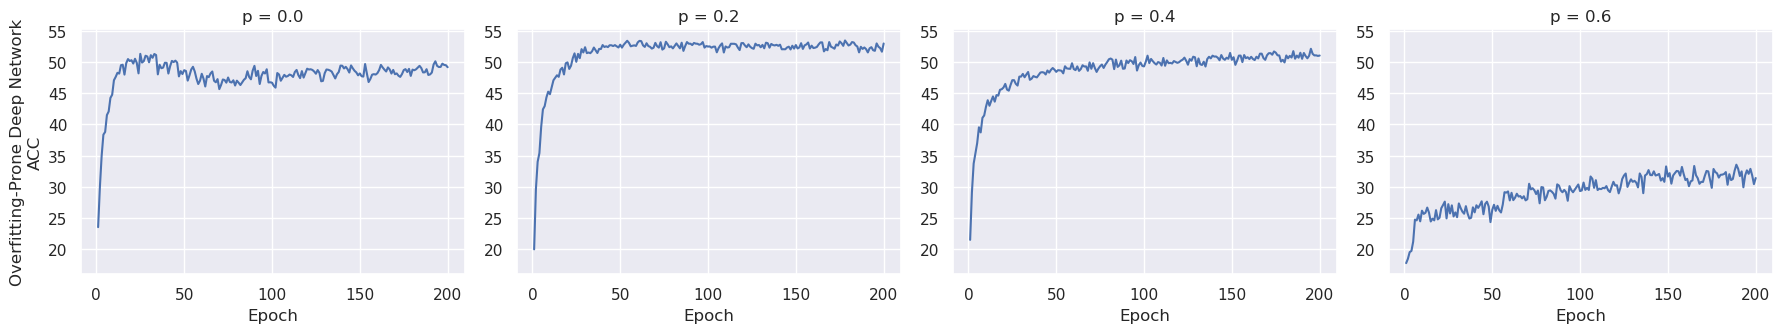

In [20]:
plot_dropout_histories(overfit_results, metric="acc")

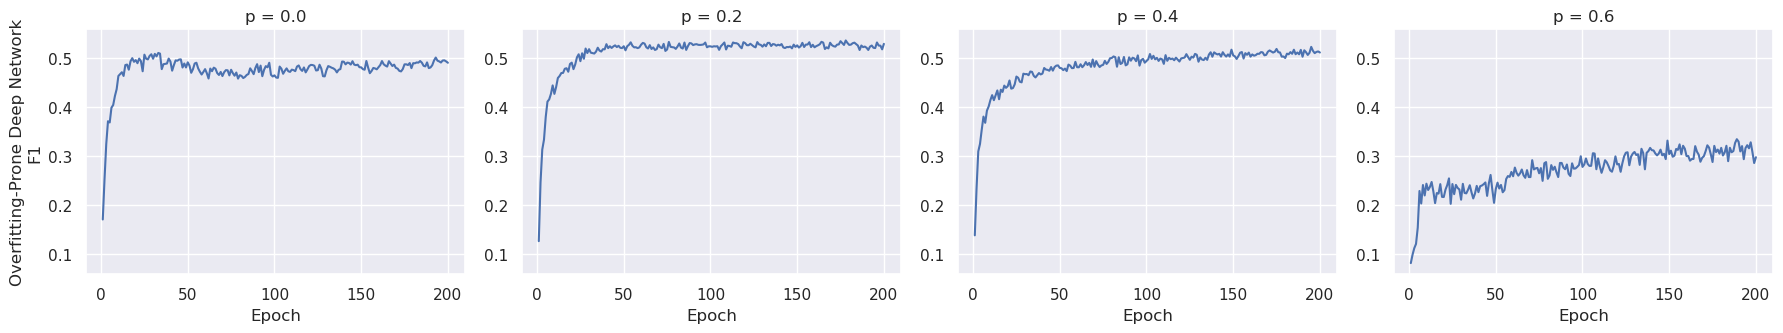

In [21]:
plot_dropout_histories(overfit_results, metric="f1")

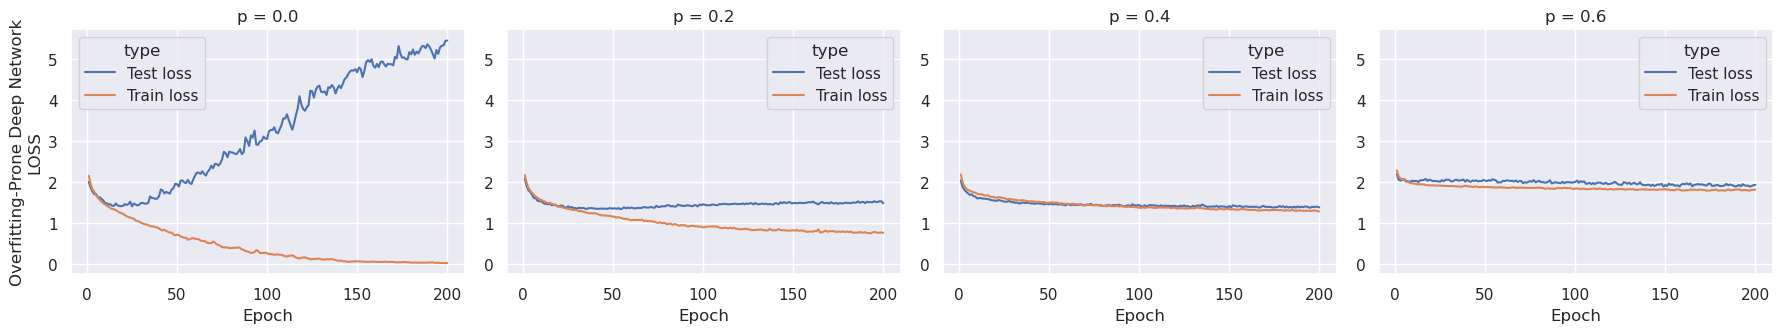

In [22]:
plot_dropout_histories(overfit_results, metric="loss")